# Model comparisons

Plan to test
- Random forest
- CNN
- Kernel SVM ?
- Gradient Boosting ?

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sn
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv("G:/My Drive/Erdos/Fall2022_Juniper/train.csv")

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15120 entries, 0 to 15119
Data columns (total 56 columns):
 #   Column                              Non-Null Count  Dtype
---  ------                              --------------  -----
 0   Id                                  15120 non-null  int64
 1   Elevation                           15120 non-null  int64
 2   Aspect                              15120 non-null  int64
 3   Slope                               15120 non-null  int64
 4   Horizontal_Distance_To_Hydrology    15120 non-null  int64
 5   Vertical_Distance_To_Hydrology      15120 non-null  int64
 6   Horizontal_Distance_To_Roadways     15120 non-null  int64
 7   Hillshade_9am                       15120 non-null  int64
 8   Hillshade_Noon                      15120 non-null  int64
 9   Hillshade_3pm                       15120 non-null  int64
 10  Horizontal_Distance_To_Fire_Points  15120 non-null  int64
 11  Wilderness_Area1                    15120 non-null  int64
 12  Wild

No missing data

In [7]:
data1 = data.copy(deep=True)
X = data1.iloc[:,1:55]
y = data1['Cover_Type']

implement cross-validataion later-
kfold = KFold(n_splits = 5, shuffle = True, random_state = 314)

In [8]:
X_train,X_test, y_train, y_test = train_test_split(X,y,
                               shuffle = True,
                               random_state=314,
                               test_size=0.3)

## Random Forest

In [9]:
rf = RandomForestClassifier(n_estimators = 100)
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)

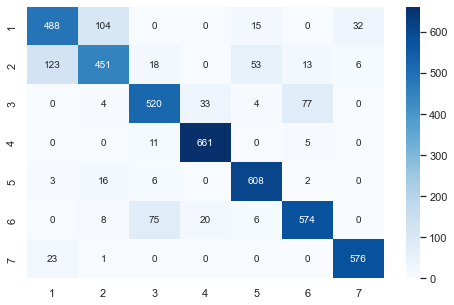

In [10]:
rf_confusion = confusion_matrix(y_test,y_pred)
rf_cm = pd.DataFrame(rf_confusion, 
                     index = [i for i in "1234567"],
                     columns = [i for i in "1234567"])
plt.figure(figsize=(8,5))
sn.set(font_scale=1)
sn.heatmap(rf_cm,annot=True,fmt='g', cmap='Blues',
           annot_kws={"size": 10})
plt.show()

In [11]:
#importing accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('Random Forest Model')
print('\nAccuracy: {:.2f}\n'.format(accuracy_score(y_test, y_pred)))

print('Micro Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='micro')))
print('Micro Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='micro')))
print('Micro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred, average='micro')))

print('Macro Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='macro')))
print('Macro Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='macro')))
print('Macro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred, average='macro')))

print('Weighted Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='weighted')))
print('Weighted F1-score: {:.2f}'.format(f1_score(y_test, y_pred, average='weighted')))

from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(y_test, y_pred, 
                            target_names=['1','2','3','4','5','6','7']))

Random Forest Model

Accuracy: 0.85

Micro Precision: 0.85
Micro Recall: 0.85
Micro F1-score: 0.85

Macro Precision: 0.85
Macro Recall: 0.86
Macro F1-score: 0.85

Weighted Precision: 0.85
Weighted Recall: 0.85
Weighted F1-score: 0.85

Classification Report

              precision    recall  f1-score   support

           1       0.77      0.76      0.76       639
           2       0.77      0.68      0.72       664
           3       0.83      0.82      0.82       638
           4       0.93      0.98      0.95       677
           5       0.89      0.96      0.92       635
           6       0.86      0.84      0.85       683
           7       0.94      0.96      0.95       600

    accuracy                           0.85      4536
   macro avg       0.85      0.86      0.85      4536
weighted avg       0.85      0.85      0.85      4536

